In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fit_moffat(x, y, cen_x0, cen_x1, cen_bounds_width=0.3):

    from astropy.modeling import models, fitting
    fit_g = fitting.TRFLSQFitter()

    bounds = {'x_0':(cen_x0-cen_bounds_width/2, cen_x0+cen_bounds_width/2)}
    amp_0 = np.nanmax(y[(x>bounds['x_0'][0]) & (x<bounds['x_0'][1])])
    g1 = models.Moffat1D(amplitude=amp_0, x_0=cen_x0, gamma=0.4, alpha=2, bounds=bounds)

    bounds = {'x_0':(cen_x1-cen_bounds_width/2, cen_x1+cen_bounds_width/2)}
    amp_1 = np.nanmax(y[(x>bounds['x_0'][0]) & (x<bounds['x_0'][1])])
    g2 = models.Moffat1D(amplitude=amp_1, x_0=cen_x1, gamma=0.4, alpha=2, bounds=bounds)
    
    g_init = g1 + g2
    g = fit_g(g_init, x, y)

    g1 = models.Moffat1D(g.amplitude_0, g.x_0_0, g.gamma_0, g.alpha_0)
    g2 = models.Moffat1D(g.amplitude_1, g.x_0_1, g.gamma_1, g.alpha_1)
    return g, g1, g2

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


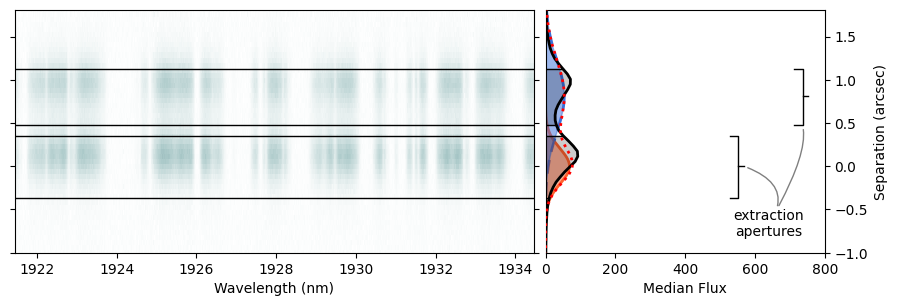

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


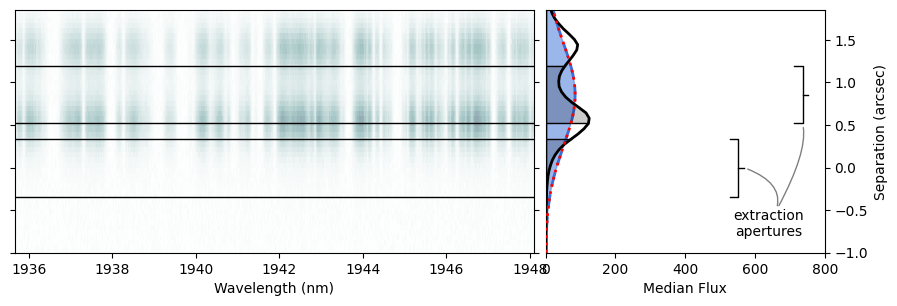

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


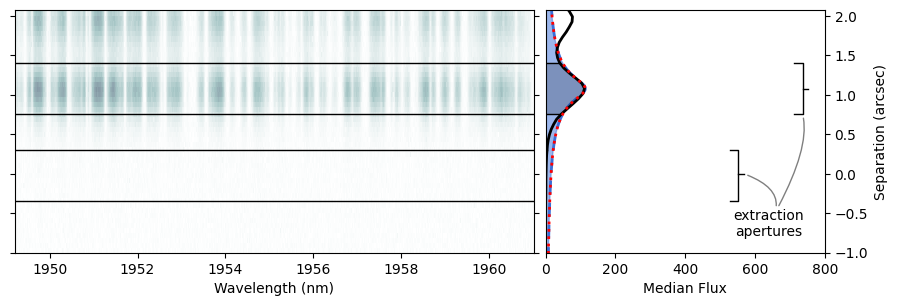

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


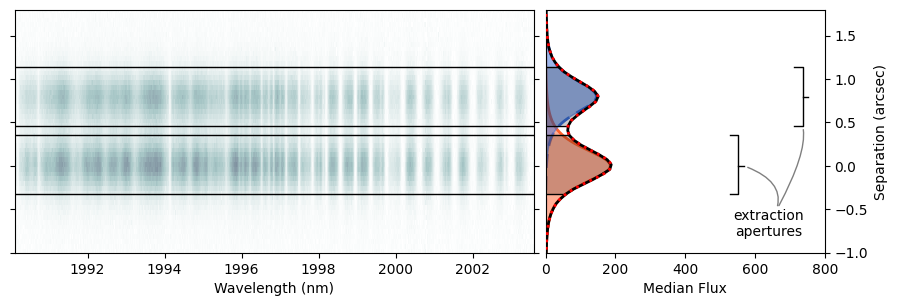

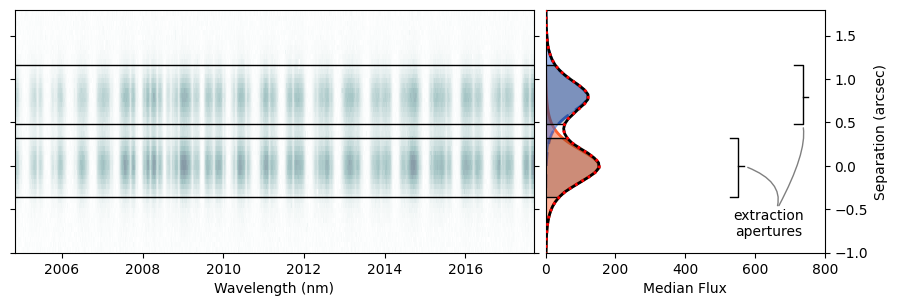

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


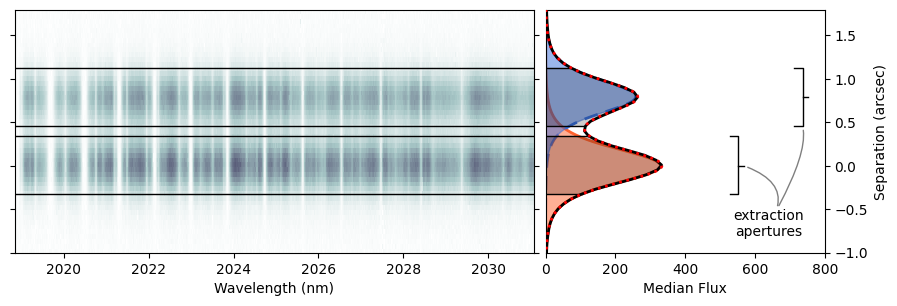

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


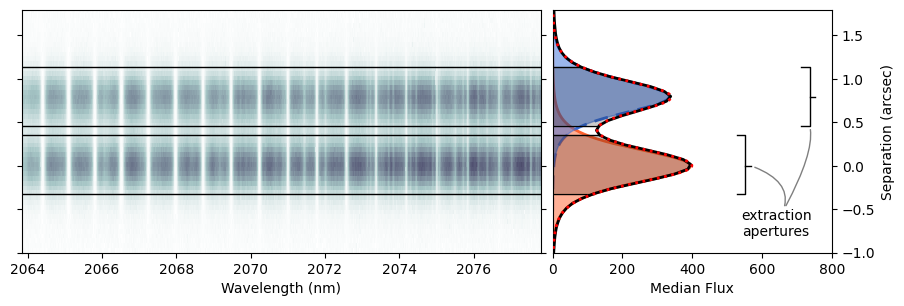

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


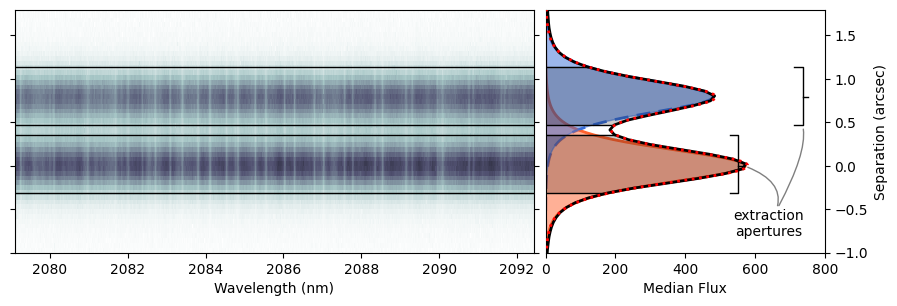

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


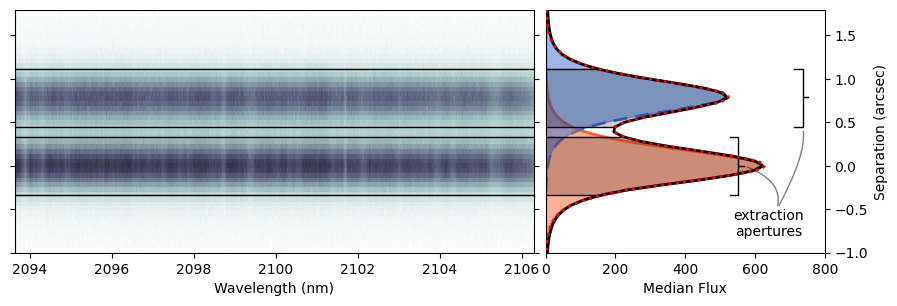

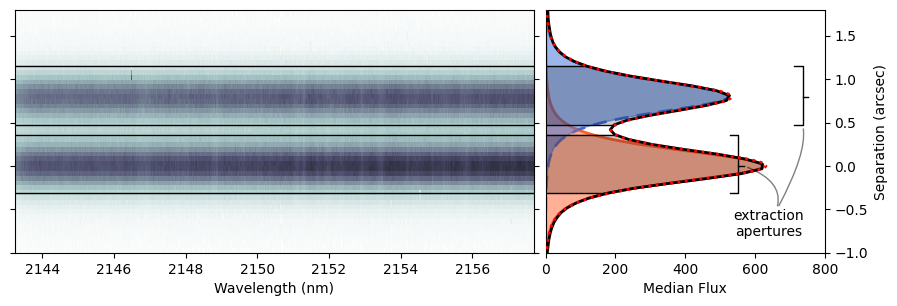

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


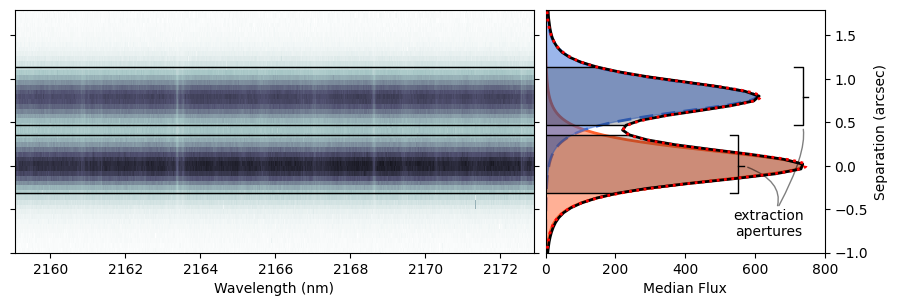

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


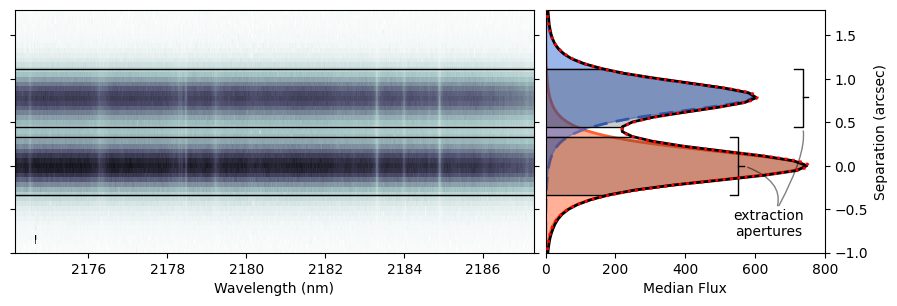

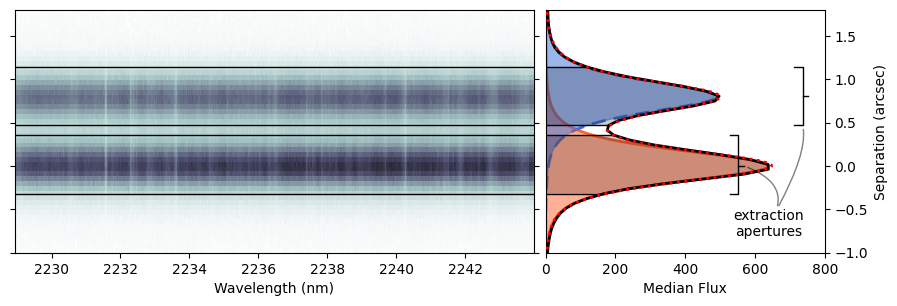

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


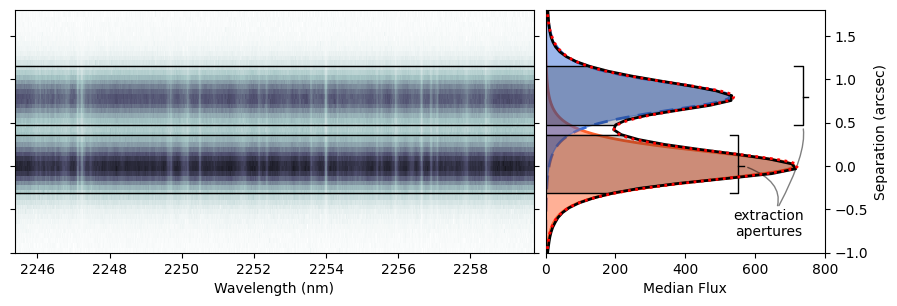

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


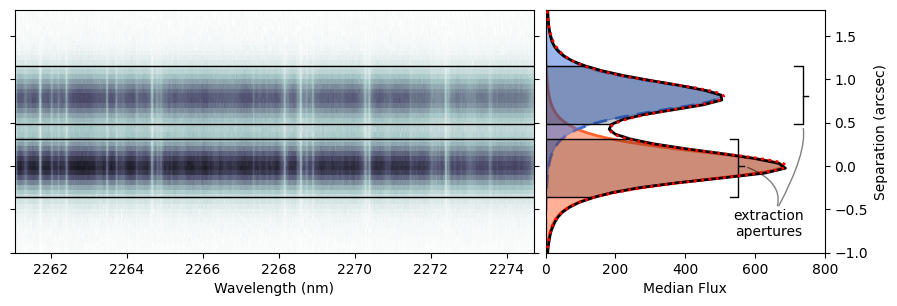

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


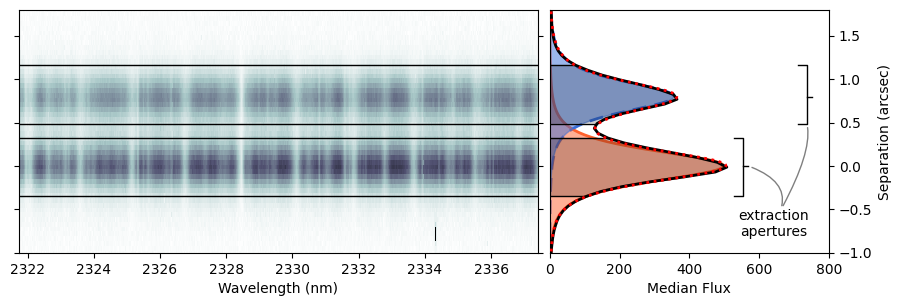

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


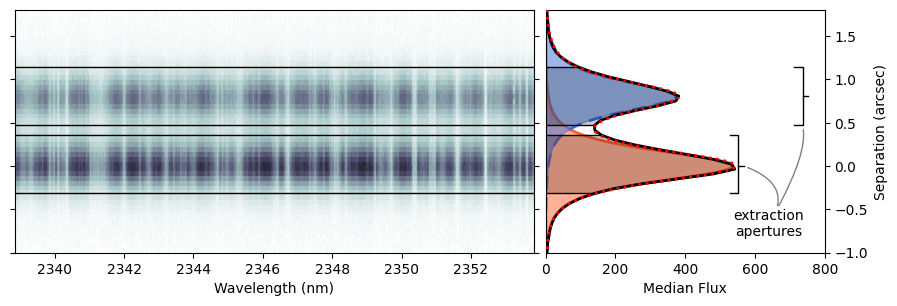

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


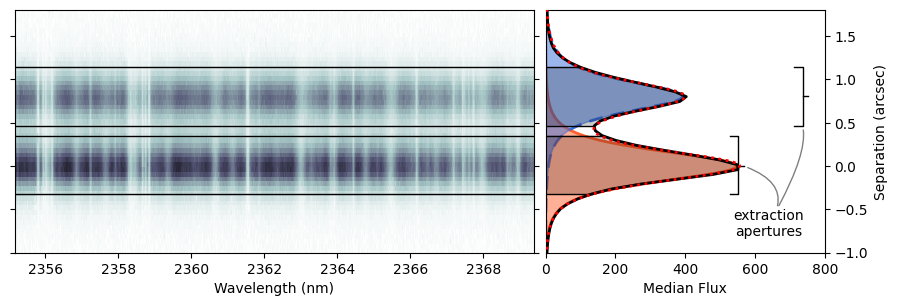

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


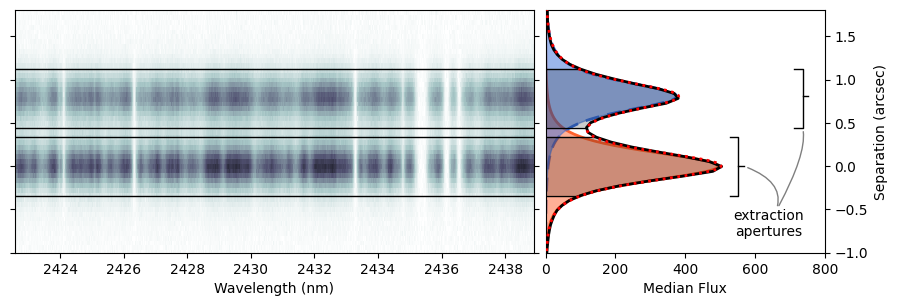

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


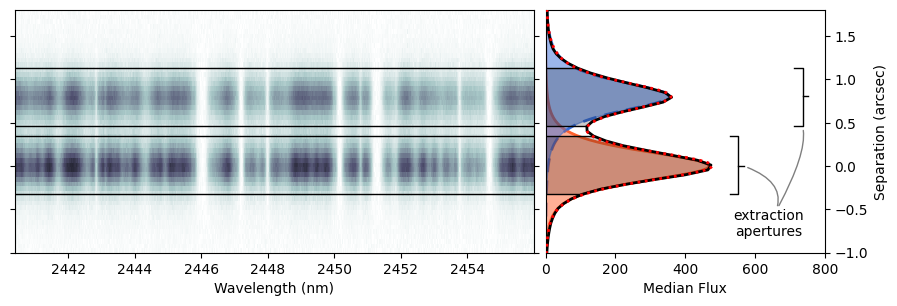

/net/lem/data1/regt/conda_env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


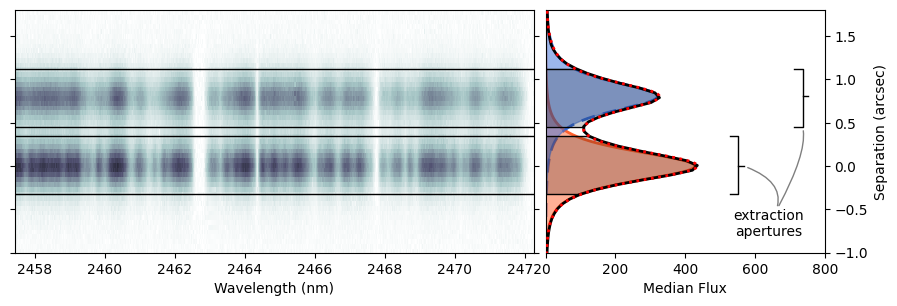

In [3]:
wave, *_ = np.loadtxt('../data/Luhman_16_std_K_molecfit_transm.dat').T
wave = wave.reshape((7,3,2048))

#i, j = 3, 1
correction_factors_applied_to_A = np.zeros((7,3))
correction_factors_applied_to_B = np.zeros((7,3))
for i in range(7):
    for j in range(3):

        rectified_spec_2d = np.load(f'../data/K_rectified_spectrum_2d/order_{6-i}_det_{j}.npy')

        x = np.linspace(-5,5,len(rectified_spec_2d))-0.13
        y = np.nanmedian(rectified_spec_2d, axis=-1)
        y -= np.nanmedian(y)

        mask = (x>=0) & (x<=4)
        y *= -1; rectified_spec_2d *= -1

        from scipy.ndimage import generic_filter
        filtered = generic_filter(rectified_spec_2d, np.nanmedian, size=(1,9), mode='constant', cval=np.nan)

        for _ in range(2):
            residuals = rectified_spec_2d - filtered
            
            bpm_mask = np.abs(residuals) > 5*np.nanstd(residuals)
            rectified_spec_2d[bpm_mask] = filtered[bpm_mask]

        x_A = 1.57
        x_B = x_A + 0.81

        x_masked, y_masked = x[mask], y[mask]
        g, g_A, g_B = fit_moffat(x_masked, y_masked, x_A, x_B)
        x_A = g_A.x_0.value
        x_B = g_B.x_0.value

        color_m_A = '#FF622E'; color_m_B = '#396ED8'

        #fig = plt.figure(figsize=(9,3))
        fig = plt.figure(figsize=(9,3))
        gs = fig.add_gridspec(nrows=1, ncols=2, hspace=0, wspace=0.03, width_ratios=[0.65,0.35])
        ax = np.array([fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1])])

        x_fine = np.linspace(x_masked.min(), x_masked.max(), 300)
        ax[1].plot(g_A(x_fine), x_fine-x_A, c=color_m_A, lw=2, zorder=-1)
        ax[1].plot(g_B(x_fine), x_fine-x_A, c=color_m_B, lw=2, ls=(0,(5,3)), zorder=-1)
        
        ax[1].plot(g(x_fine), x_fine-x_A, c='r', lw=2, ls=':', zorder=10)

        ax[1].fill_betweenx(x_fine-x_A, 0, g_A(x_fine), color=color_m_A, alpha=0.5)
        ax[1].fill_betweenx(x_fine-x_A, 0, g_B(x_fine), color=color_m_B, alpha=0.5)
        ax[1].plot(y_masked, x_masked-x_A, color='k', lw=2)

        aper_width = 13*0.056
        int_mask_A = (x_masked >= x_A-aper_width/2) & (x_masked <= x_A+aper_width/2)
        int_mask_B = (x_masked >= x_B-aper_width/2) & (x_masked <= x_B+aper_width/2)

        ax[1].fill_betweenx(x_masked[int_mask_A]-x_A, 0, y_masked[int_mask_A], fc='k', alpha=0.2, ec='none')
        ax[1].fill_betweenx(x_masked[int_mask_B]-x_A, 0, y_masked[int_mask_B], fc='k', alpha=0.2, ec='none')
        ax[1].plot([0,y_masked[int_mask_A][0]], [x_masked[int_mask_A][0]-x_A]*2, c='k', lw=1, ls='-')
        ax[1].plot([0,y_masked[int_mask_A][-1]], [x_masked[int_mask_A][-1]-x_A]*2, c='k', lw=1, ls='-')
        ax[1].plot([0,y_masked[int_mask_B][0]], [x_masked[int_mask_B][0]-x_A]*2, c='k', lw=1, ls='-')
        ax[1].plot([0,y_masked[int_mask_B][-1]], [x_masked[int_mask_B][-1]-x_A]*2, c='k', lw=1, ls='-')

        ax[0].plot([0,1], [x_masked[int_mask_A][0]-x_A]*2, c='k', lw=1, ls='-', transform=ax[0].get_yaxis_transform())
        ax[0].plot([0,1], [x_masked[int_mask_A][-1]-x_A]*2, c='k', lw=1, ls='-', transform=ax[0].get_yaxis_transform())
        ax[0].plot([0,1], [x_masked[int_mask_B][0]-x_A]*2, c='k', lw=1, ls='-', transform=ax[0].get_yaxis_transform())
        ax[0].plot([0,1], [x_masked[int_mask_B][-1]-x_A]*2, c='k', lw=1, ls='-', transform=ax[0].get_yaxis_transform())

        ax[1].plot(
            0.69-np.array([1,0,0,1])*0.03, x_masked[int_mask_A][[0,0,-1,-1]]-x_A, 
            transform=ax[1].get_yaxis_transform(), c='k', lw=1
        )

        ax[1].plot(
            0.92-np.array([1,0,0,1])*0.03, x_masked[int_mask_B][[0,0,-1,-1]]-x_A, 
            transform=ax[1].get_yaxis_transform(), c='k', lw=1
        )

        ylim = (x_A-x_A-1., x_B-x_A+1.)
        ax[1].set(xlim=(0,800), ylim=ylim, xlabel='Median Flux', ylabel='Separation (arcsec)')
        ax[1].yaxis.tick_right(); ax[1].yaxis.set_label_position('right')

        ax[1].axhline(x_A-x_A, xmin=0.69, xmax=0.69+0.02, color='k', lw=1)
        ax[1].axhline(x_B-x_A, xmin=0.92, xmax=0.92+0.02, color='k', lw=1)

        ax[1].annotate(
            'extraction\n'+'apertures', xy=(0.69+0.02,x_A-x_A), xycoords=ax[1].get_yaxis_transform(),
            xytext=(0.8,0.12), textcoords='axes fraction', 
            ha='center', va='center', fontsize=10, c='w', 
            arrowprops={
                'arrowstyle':'-', 'connectionstyle':'angle3,angleA=55,angleB=-20', 
                'shrinkA':0, 'shrinkB':3., 'lw':1, 'color':'k', 'alpha':0.5, 
                }, 

        )
        ax[1].annotate(
            'extraction\n'+'apertures', xy=(0.92,x_masked[int_mask_B][0]-x_A), xycoords=ax[1].get_yaxis_transform(),
            xytext=(0.8,0.12), textcoords='axes fraction', 
            ha='center', va='center', fontsize=10, c='k', 
            arrowprops={
                'arrowstyle':'-', 'connectionstyle':'angle3,angleA=60,angleB=-75', 
                'shrinkA':0, 'shrinkB':3., 'lw':1, 'color':'k', 'alpha':0.5, 
                }, 

        )

        xlim = (wave[i,j,20:-20].min(axis=-1), wave[i,j,20:-20].max(axis=-1))
        ax[0].imshow(
            #rectified_spec_2d[mask][:,20:-20], cmap='magma', vmin=-10, vmax=190, 
            #rectified_spec_2d[mask][:,20:-20], cmap='Greys', vmin=-10, vmax=190, 
            #rectified_spec_2d[mask][:,20:-20], cmap='bone_r', vmin=-10, vmax=190, 
            rectified_spec_2d[mask][:,20:-20], cmap='bone_r', vmin=-10, vmax=900, 
            aspect='auto', interpolation='none',
            extent=[xlim[0], xlim[1], x_masked[-1]-x_A, x_masked[0]-x_A], 
            )
        ax[0].set(xlim=xlim, ylim=ylim, xlabel='Wavelength (nm)', yticklabels=[])
        ax[0].yaxis.set_ticks_position('both')

        plt.subplots_adjust(left=0.02, bottom=0.16, top=0.97, right=0.92)
        #plt.savefig(f'./plots/J_band_blend_corr.pdf')

        plt.show()

        correction_factors_applied_to_A[i,j] = np.trapz(y=g_A(x_masked[int_mask_B]), x=x_masked[int_mask_B]) / np.trapz(y=g_A(x_masked[int_mask_A]), x=x_masked[int_mask_A])
        correction_factors_applied_to_B[i,j] = np.trapz(y=g_B(x_masked[int_mask_A]), x=x_masked[int_mask_A]) / np.trapz(y=g_B(x_masked[int_mask_B]), x=x_masked[int_mask_B])

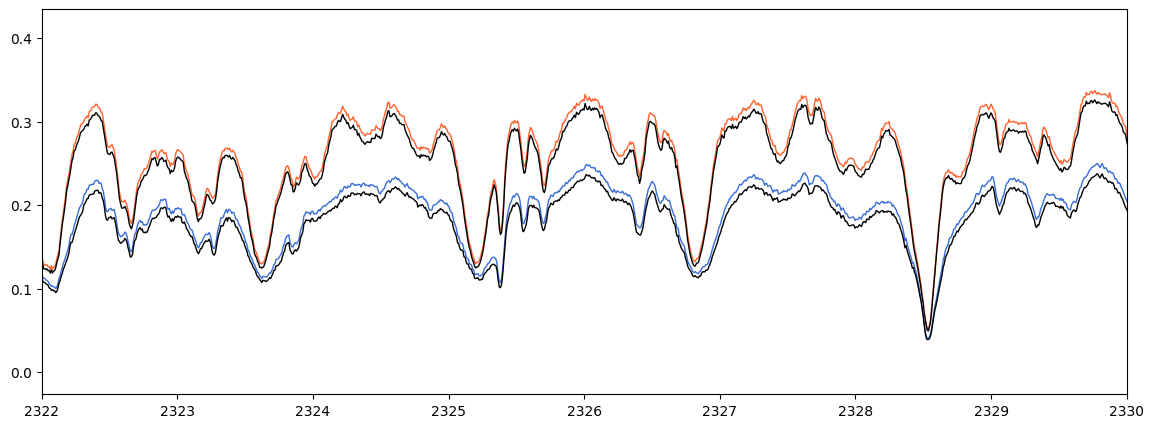

In [24]:
wave_A, flux_A, err_A = np.loadtxt('../data/Luhman_16A_K.dat').T
wave_B, flux_B, err_B = np.loadtxt('../data/Luhman_16B_K.dat').T

flux_A = flux_A.reshape((7,3,2048))
flux_B = flux_B.reshape((7,3,2048))
err_A = err_A.reshape((7,3,2048))
err_B = err_B.reshape((7,3,2048))

new_correction_factors_applied_to_A = correction_factors_applied_to_A.copy()
new_correction_factors_applied_to_A[0] = new_correction_factors_applied_to_A[1]
new_correction_factors_applied_to_A = new_correction_factors_applied_to_A[:,:,None]

new_correction_factors_applied_to_B = correction_factors_applied_to_B.copy()
new_correction_factors_applied_to_B[0] = new_correction_factors_applied_to_B[1]
new_correction_factors_applied_to_B = new_correction_factors_applied_to_B[:,:,None]

flux_A_corr = flux_A - new_correction_factors_applied_to_B * flux_B
flux_B_corr = flux_B - new_correction_factors_applied_to_A * flux_A

err_A_corr = np.sqrt(err_A**2 + (new_correction_factors_applied_to_B * err_B)**2)
err_B_corr = np.sqrt(err_B**2 + (new_correction_factors_applied_to_A * err_A)**2)

fig, ax = plt.subplots(figsize=(14,5))
ax.plot(wave_A, flux_A.flatten(), c=color_m_A, lw=1)
ax.plot(wave_A, flux_A_corr.flatten(), c='k', lw=1)

ax.plot(wave_B, flux_B.flatten(), c=color_m_B, lw=1)
ax.plot(wave_B, flux_B_corr.flatten(), c='k', lw=1)
#ax.set(xlim=(2230,2270))
ax.set(xlim=(2322,2330))
plt.show()

#plt.plot(correction_factors_applied_to_A.flatten(), 'o-', label='A')
#plt.plot(correction_factors_applied_to_B.flatten(), 'o-', label='B')
#plt.ylim(0,0.1)

In [33]:
X = np.vstack((wave_A, flux_A_corr.flatten(), err_A_corr.flatten())).T
np.savetxt('../data/Luhman_16A_K_blend_corr.dat', X, header='Wlen(nm) Flux Flux_err')

X = np.vstack((wave_B, flux_B_corr.flatten(), err_B_corr.flatten())).T
np.savetxt('../data/Luhman_16B_K_blend_corr.dat', X, header='Wlen(nm) Flux Flux_err')